In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(name,filename='/content/', quality=0.5):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      //const capture = document.createElement('button');
      //capture.textContent = 'Capture';
      //div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      //await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename+name, 'wb') as f:
    f.write(binary)
  return filename+name

<IPython.core.display.Javascript object>

set_1 right 1 taken


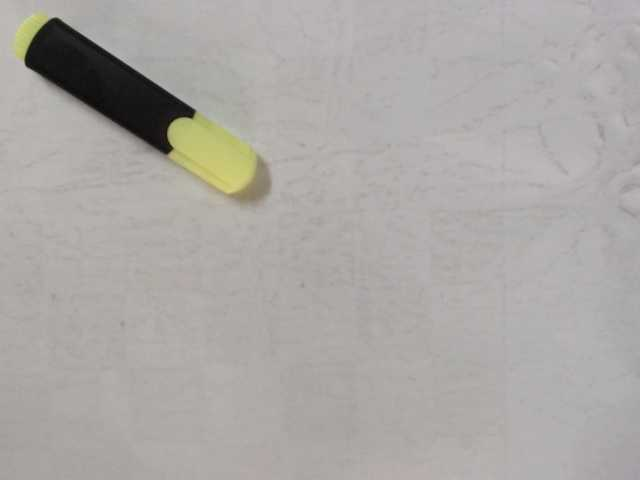

In [ ]:
from IPython.display import Image
import time
for i in range(0,1):
  name = 'set_1_right.jpeg'
  filename = take_photo(name)
  print("set_1 right",i+1,"taken")
display(Image(filename))

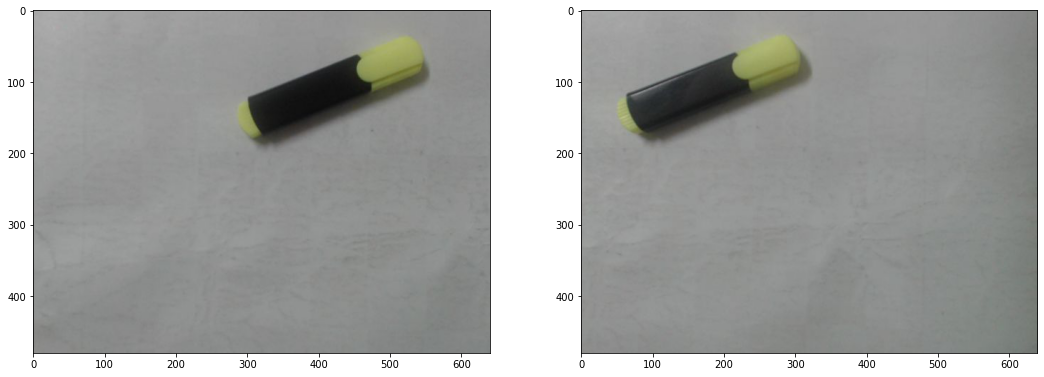

In [ ]:
path_1 = '/content/photo2.3.jpg'
path_2 = '/content/photo2.2.jpg'

left_image = plt.imread(path_1)
right_image = plt.imread(path_2)

plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
plt.imshow(left_image)
plt.subplot(1,2,2)
plt.imshow(right_image)

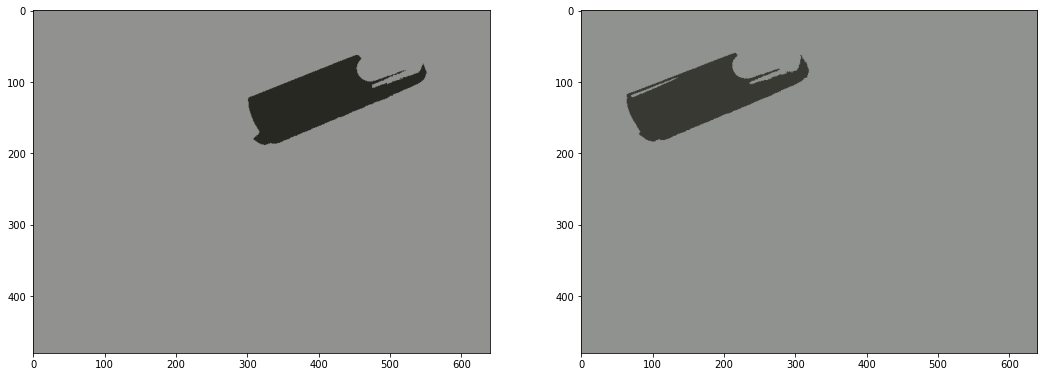

In [ ]:
#left image clustering
image2 = left_image.reshape(left_image.shape[0]*left_image.shape[1],left_image.shape[2])
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=0).fit(image2)
res_1 = kmeans.cluster_centers_[kmeans.labels_]
res_1 = res_1.reshape(left_image.shape[0],left_image.shape[1],left_image.shape[2])/255

#right image clustering
image2 = right_image.reshape(right_image.shape[0]*right_image.shape[1],right_image.shape[2])
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=0).fit(image2)
res_2 = kmeans.cluster_centers_[kmeans.labels_]
res_2 = res_2.reshape(right_image.shape[0],right_image.shape[1],right_image.shape[2])/255

plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(res_1)
plt.subplot(1,2,2)
plt.imshow(res_2)

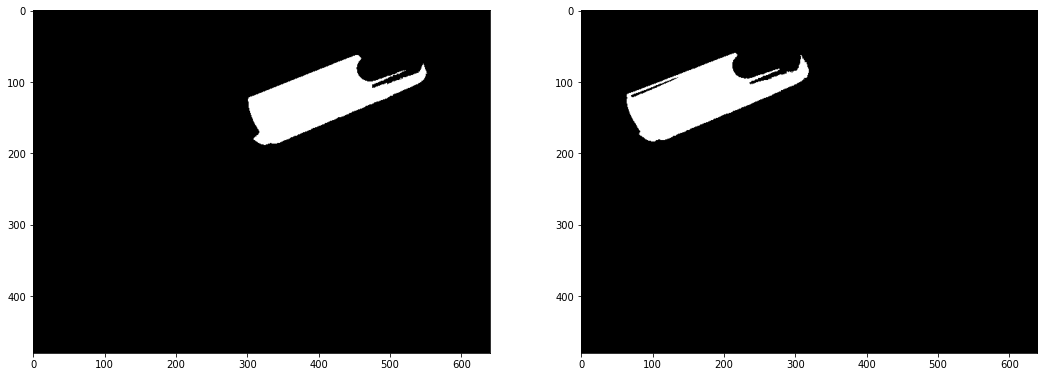

In [ ]:
for i in range(res_1.shape[0]):
  for j in range(res_1.shape[1]):
    for k in range(res_1.shape[2]):
      if res_1[i][j][k]>0.5:
        res_1[i][j][k]=0
      else:
        res_1[i][j][k]=1

for i in range(res_2.shape[0]):
  for j in range(res_2.shape[1]):
    for k in range(res_2.shape[2]):
      if res_2[i][j][k]>0.5:
        res_2[i][j][k]=0
      else:
        res_2[i][j][k]=1

plt.imsave('/content/left_bin.jpeg',res_1)
plt.imsave('/content/right_bin.jpeg',res_2)


plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(res_1)
plt.subplot(1,2,2)
plt.imshow(res_2)

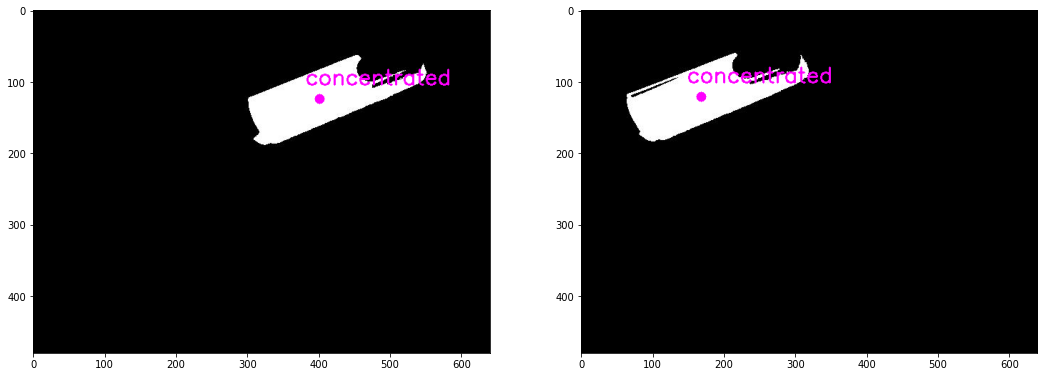

In [ ]:
from google.colab.patches import cv2_imshow
import imutils
left_bin_pth = '/content/left_bin.jpeg'
right_bin_pth = '/content/right_bin.jpeg'
left_center = []
right_center = []

image_l = cv2.imread(left_bin_pth)
gray = cv2.cvtColor(image_l, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
  M = cv2.moments(c)
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
  left_center.append([cX,cY])
  #cv2.drawContours(image_l, [c], -1, (0, 255, 0), 2)
  cv2.circle(image_l, (cX, cY), 7, (255, 0, 255), -1)
  cv2.putText(image_l, "concentrated", (cX - 20, cY - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

image_r = cv2.imread(right_bin_pth)
gray = cv2.cvtColor(image_r, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
  M = cv2.moments(c)
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
  right_center.append([cX,cY])
  #cv2.drawContours(image_r, [c], -1, (0, 255, 0), 2)
  cv2.circle(image_r, (cX, cY), 7, (255, 0, 255), -1)
  cv2.putText(image_r, "concentrated", (cX - 20, cY - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(image_l)
plt.subplot(1,2,2)
plt.imshow(image_r)

plt.imsave('/content/left_con.jpeg',image_l)
plt.imsave('/content/right.con.jpeg',image_r)

In [ ]:
print(left_center)
print(right_center)

[[401, 124]]
[[168, 121]]


In [ ]:
import math

def tan(angle):
  return math.tan(angle*22/1260)

theta_w = 57 #xwidth angle of webcam
theta_h = 42 #ywidth angle of webcam

a = 90 - (theta_w*abs(left_center[0][0]-320)/640) #angle b/w point and leftcam
b = 90 - (theta_w*abs(right_center[0][0]-320)/640) #angle b/w point and rightcam
l = 10 #dist b/w cam in cms
d = (l*tan(a)*tan(b))/(tan(a)+tan(b))

a_prime = theta_h*abs(left_center[0][1]-240)/480

X_coord = d/tan(a)
Y_coord = d*tan(a_prime)
Z_coord = d

print('X:',X_coord,'Y:',Y_coord,'Z:',Z_coord)

X: 3.440498947514235 Y: 4.89092635032823 Z: 27.308169814339145
